## Minecraft Player Data Analysis Project  

![Minecraft](https://upload.wikimedia.org/wikipedia/en/b/b6/Minecraft_2024_cover_art.png)

## Introduction
#### Background Information
Aresearch group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They record players' actions as they play through a MineCraft serverLinks to an external site.

### Question 2:
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
### Can age predict the hours played in this dataset?

* This dataset will help indicate whether age can predict the amount of time a Minecraft user plays for. This relationship could help user engagement, refine marketing strategies, increase sales and gaming suggestions.



## Players Dataset Overview:
This dataset observes Minecraft user's gaming experience and contains information like player status, subscription, playtime, and demographics. 
* Number of observations (rows): 196
* Number of variables (columns): 7


## Columns in the Players Data Set:
### Numerical (dbl):
* `played_hours` - The number of hours the user has played.
* `Age`- the age of the player.

### Character (chr):
* `hashedEmail`- encrypted email for user identification.
* `name`- The name of the player.
* `gender`- Classified as either Male, Female, Non-binary, or Prefer not to say
* `experience`- The level of experience classified (Pro, Veteran, Regular, Amatuer, or Beginner)

### Logical (lgl)
* `subscribe`- Whether the player is subscribed (either TRUE or FALSE)



## Sessions Dataset Overview:
This dataset tracks player's sessions, such as hashed email, start times and end times (one is human-readable, the other is UNIX timestamped).
* Number of observations (rows): 1535
* Number of variables (columns): 5


## Columns in the Sessions Data Set:

### Character (chr):
* `hashedEmail`- encrypted and anonymous user identification. 
* `start_time`- Session start time (DD/MM/YYYY Hour:Minute)
* `end_time`- Session end time (DD/MM/YYYY Hour:Minute)

### Numerical (dbl):
* `original_start_time`- UNIX timestamp of session start time.
* `original_end_time`- UNIX timestamp of session end time.


# Methods and Results
* Describe the methods you used to perform your analysis from beginning to end that narrates the analysis code

In [12]:
url<- "https://drive.google.com/uc?export=download&id=1QRsHcWfUyvOWJpKgwFCw3csjRN5NL1L3"
sessions<- read_csv(url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [13]:
library(tidyverse)
library(tidymodels)
set.seed(123)

In [2]:
url<- "https://drive.google.com/uc?export=download&id=1jv3p3Ai0a1pNS-hk7csk1I9l21fYy-_t"
players<-read_csv(url)
head(players)

players_split<- initial_split(players, prop=0.70, strata= Age)
players_train<- training(players_split)
players_test<- testing(players_split)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
mean_values<- players_train|>
summarise(
    mean_played_hours= mean(played_hours, na.rm=TRUE),
    mean_age= mean(Age, na.rm=TRUE))
mean_values

players_train <- players_train|>
mutate(played_minutes= (played_hours*60))

Summary_statistics_players <- players_train|>
summarise(
    min_played_hours= min(played_hours, na.rm=TRUE),
    min_played_minutes= min(played_minutes, na.rm=TRUE),
    min_age= min(Age, na.rm=TRUE),
    max_played_hours= max(played_hours, na.rm=TRUE),
    max_played_minutes=max(played_minutes, na.rm=TRUE),
   max_age= max(Age, na.rm=TRUE))
Summary_statistics_players


mean_played_hours,mean_age
<dbl>,<dbl>
4.928148,20.89552


min_played_hours,min_played_minutes,min_age,max_played_hours,max_played_minutes,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,10,223.1,13386,50


experience,subscribe,hashedEmail,played_hours,name,gender,Age,played_minutes
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,6
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17,0
Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17,0
Beginner,TRUE,9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0,0.0,Elodie,Female,17,0
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17,2904
Amateur,TRUE,ab1f44f93c3b828f55458971db393052d9711df3e0e7ff69540bfebfcec555ff,0.5,Marley,Male,17,30


experience,subscribe,hashedEmail,played_hours,name,gender,Age,played_minutes
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,6
Amateur,TRUE,ab1f44f93c3b828f55458971db393052d9711df3e0e7ff69540bfebfcec555ff,0.5,Marley,Male,17,30
Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17,6
Beginner,TRUE,f9ac013b2f0bc2bd4928a6a0fc8a0aae8b5c4f2670cf9e18f547b7e72034c965,1.0,Leah,Male,17,60
Amateur,TRUE,e3e1bef1ce259c995332635c0ec630a575713451cbe742d7ca93e4c03d0826df,0.2,Kennedy,Male,17,12
Veteran,TRUE,d07befbac08be3d876d026ac0458651067001b39081d24724af3c95be76355e0,0.1,Yvette,Non-binary,17,6


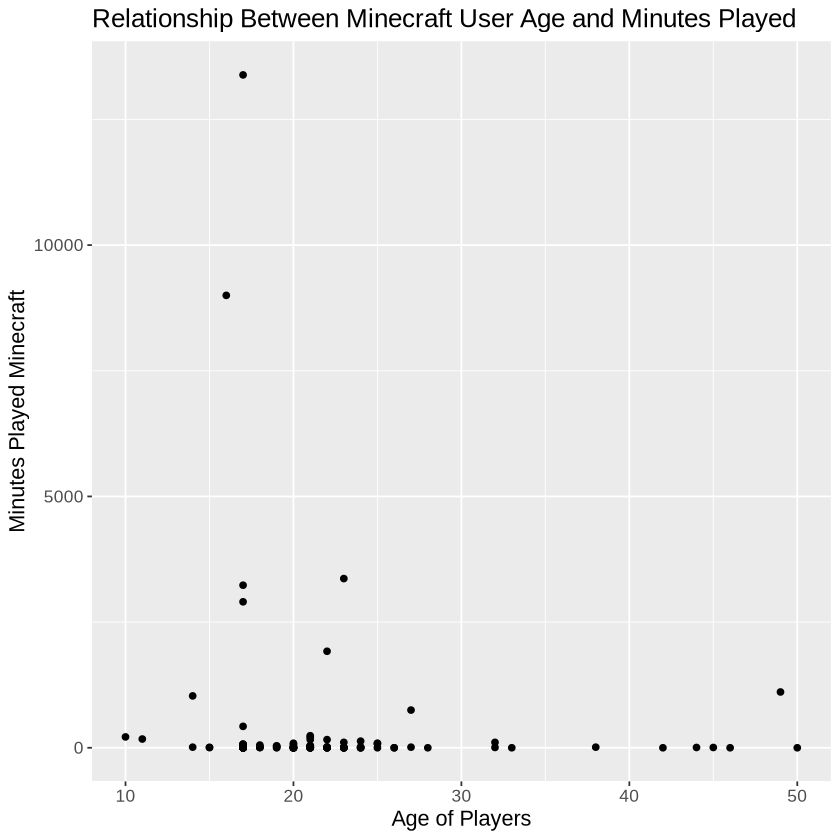

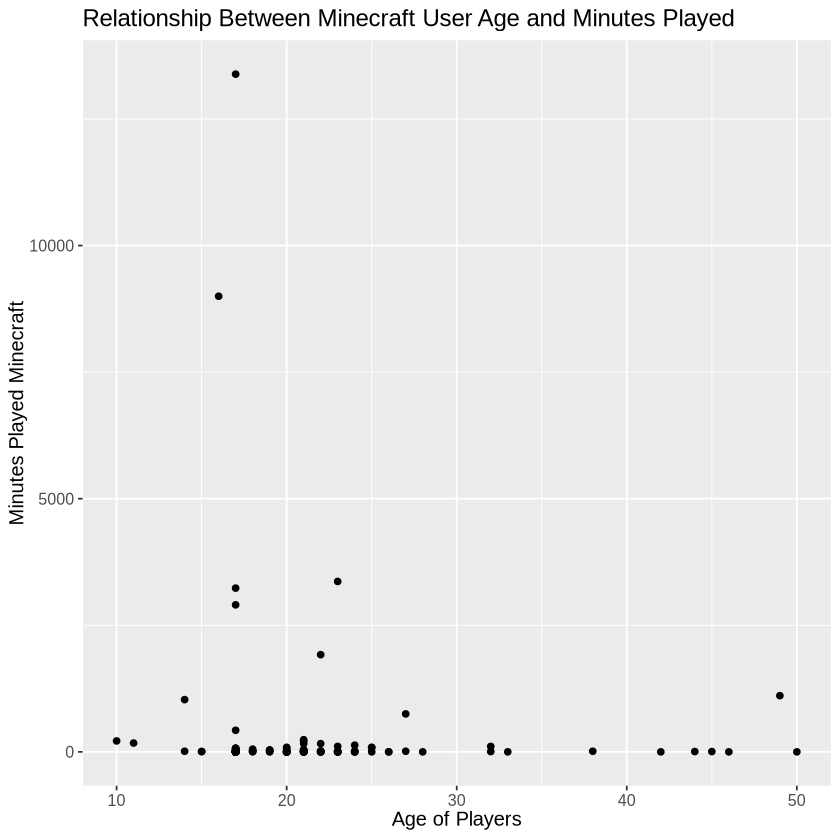

In [4]:
players_train<- players_train|>
drop_na(Age, played_hours)
head(players_train)


player_filtered<- filter(players_train, Age<30, played_hours>0 & played_hours<10)
head(player_filtered)







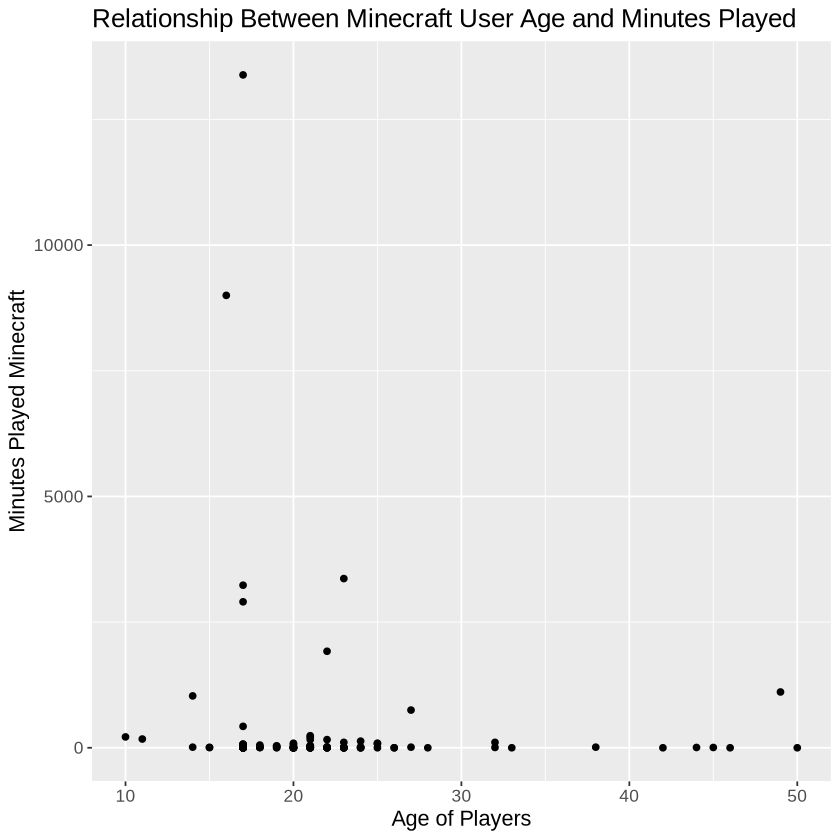

In [9]:
Minecraft_plot<- players_train|>
ggplot(aes(x=Age, y=played_minutes))+
geom_point()+
xlab("Age of Players")+
ylab("Minutes Played Minecraft")+
theme(text=element_text(size=13))+
ggtitle("Relationship Between Minecraft User Age and Minutes Played")
Minecraft_plot



In [10]:


players_recipe<- recipe(played_minutes~ Age, data=players_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

players_spec<- nearest_neighbor(weight_func= "rectangular", neighbors=tune())|>
set_engine("kknn")|>
set_mode("regression")

players_vfold<- vfold_cv(players_train, v=5, strata= Age)

players_wkflw<- workflow()|>
add_recipe(players_recipe)|>
add_model(players_spec)
players_wkflw


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [11]:
gridvals<- tibble(neighbors=seq(from=1, to=50, by=3))

players_results<- players_wkflw|>
tune_grid(resamples= players_vfold, grid=gridvals)|>
collect_metrics()|>
filter(.metric== "rmse")
players_results







neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1016.673,5,527.7481,Preprocessor1_Model01
4,rmse,standard,1271.394,5,433.0278,Preprocessor1_Model02
7,rmse,standard,1164.590,5,446.9985,Preprocessor1_Model03
10,rmse,standard,1119.270,5,469.9230,Preprocessor1_Model04
13,rmse,standard,1107.187,5,488.0663,Preprocessor1_Model05
16,rmse,standard,1149.544,5,470.0786,Preprocessor1_Model06
19,rmse,standard,1104.720,5,482.0031,Preprocessor1_Model07
22,rmse,standard,1288.615,5,392.7293,Preprocessor1_Model08
25,rmse,standard,1243.826,5,411.1699,Preprocessor1_Model09


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## Discussion:
* summarize what you found
* discuss whether this is what you expected to find?
* discuss what impact could such findings have?
* discuss what future questions could this lead to?
